# 1- Import used libraries

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:

gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True) 

# 2- Data cleaning

In [19]:
data_dir = 'D:\jupyter\happy_sad_classfier\ImageClassification-main\data' 


In [20]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [21]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) 
            tip = imghdr.what(image_path) 
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3- Load Data

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
#data = tf.keras.utils.image_dataset_from_directory??


In [24]:
data = tf.keras.utils.image_dataset_from_directory('D:\jupyter\happy_sad_classfier\ImageClassification-main\data')

Found 305 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

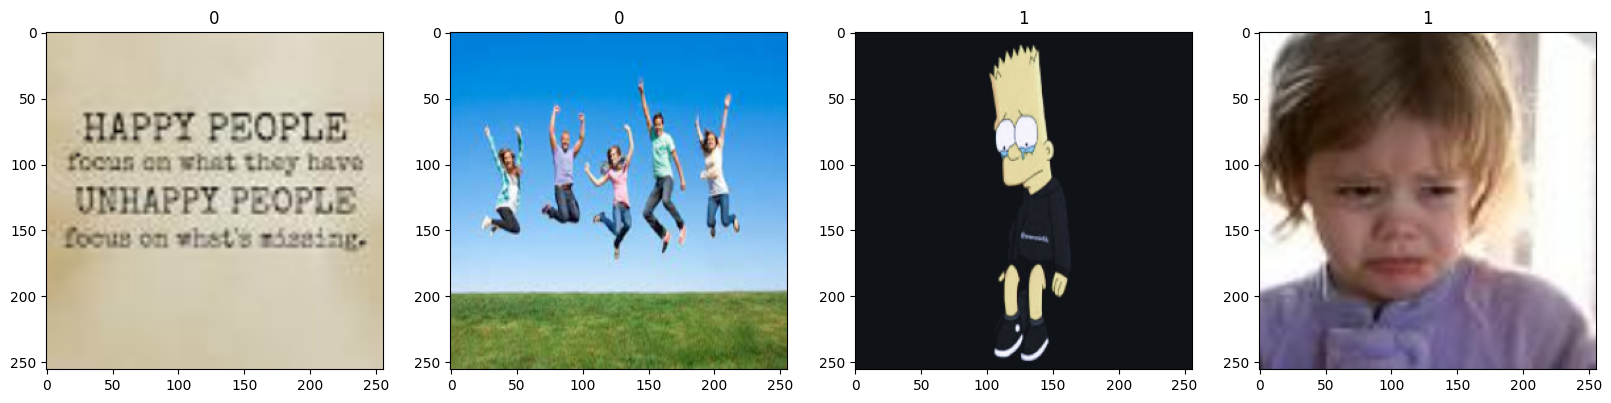

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4- Data Augmentation 

Found 305 images belonging to 2 classes.
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


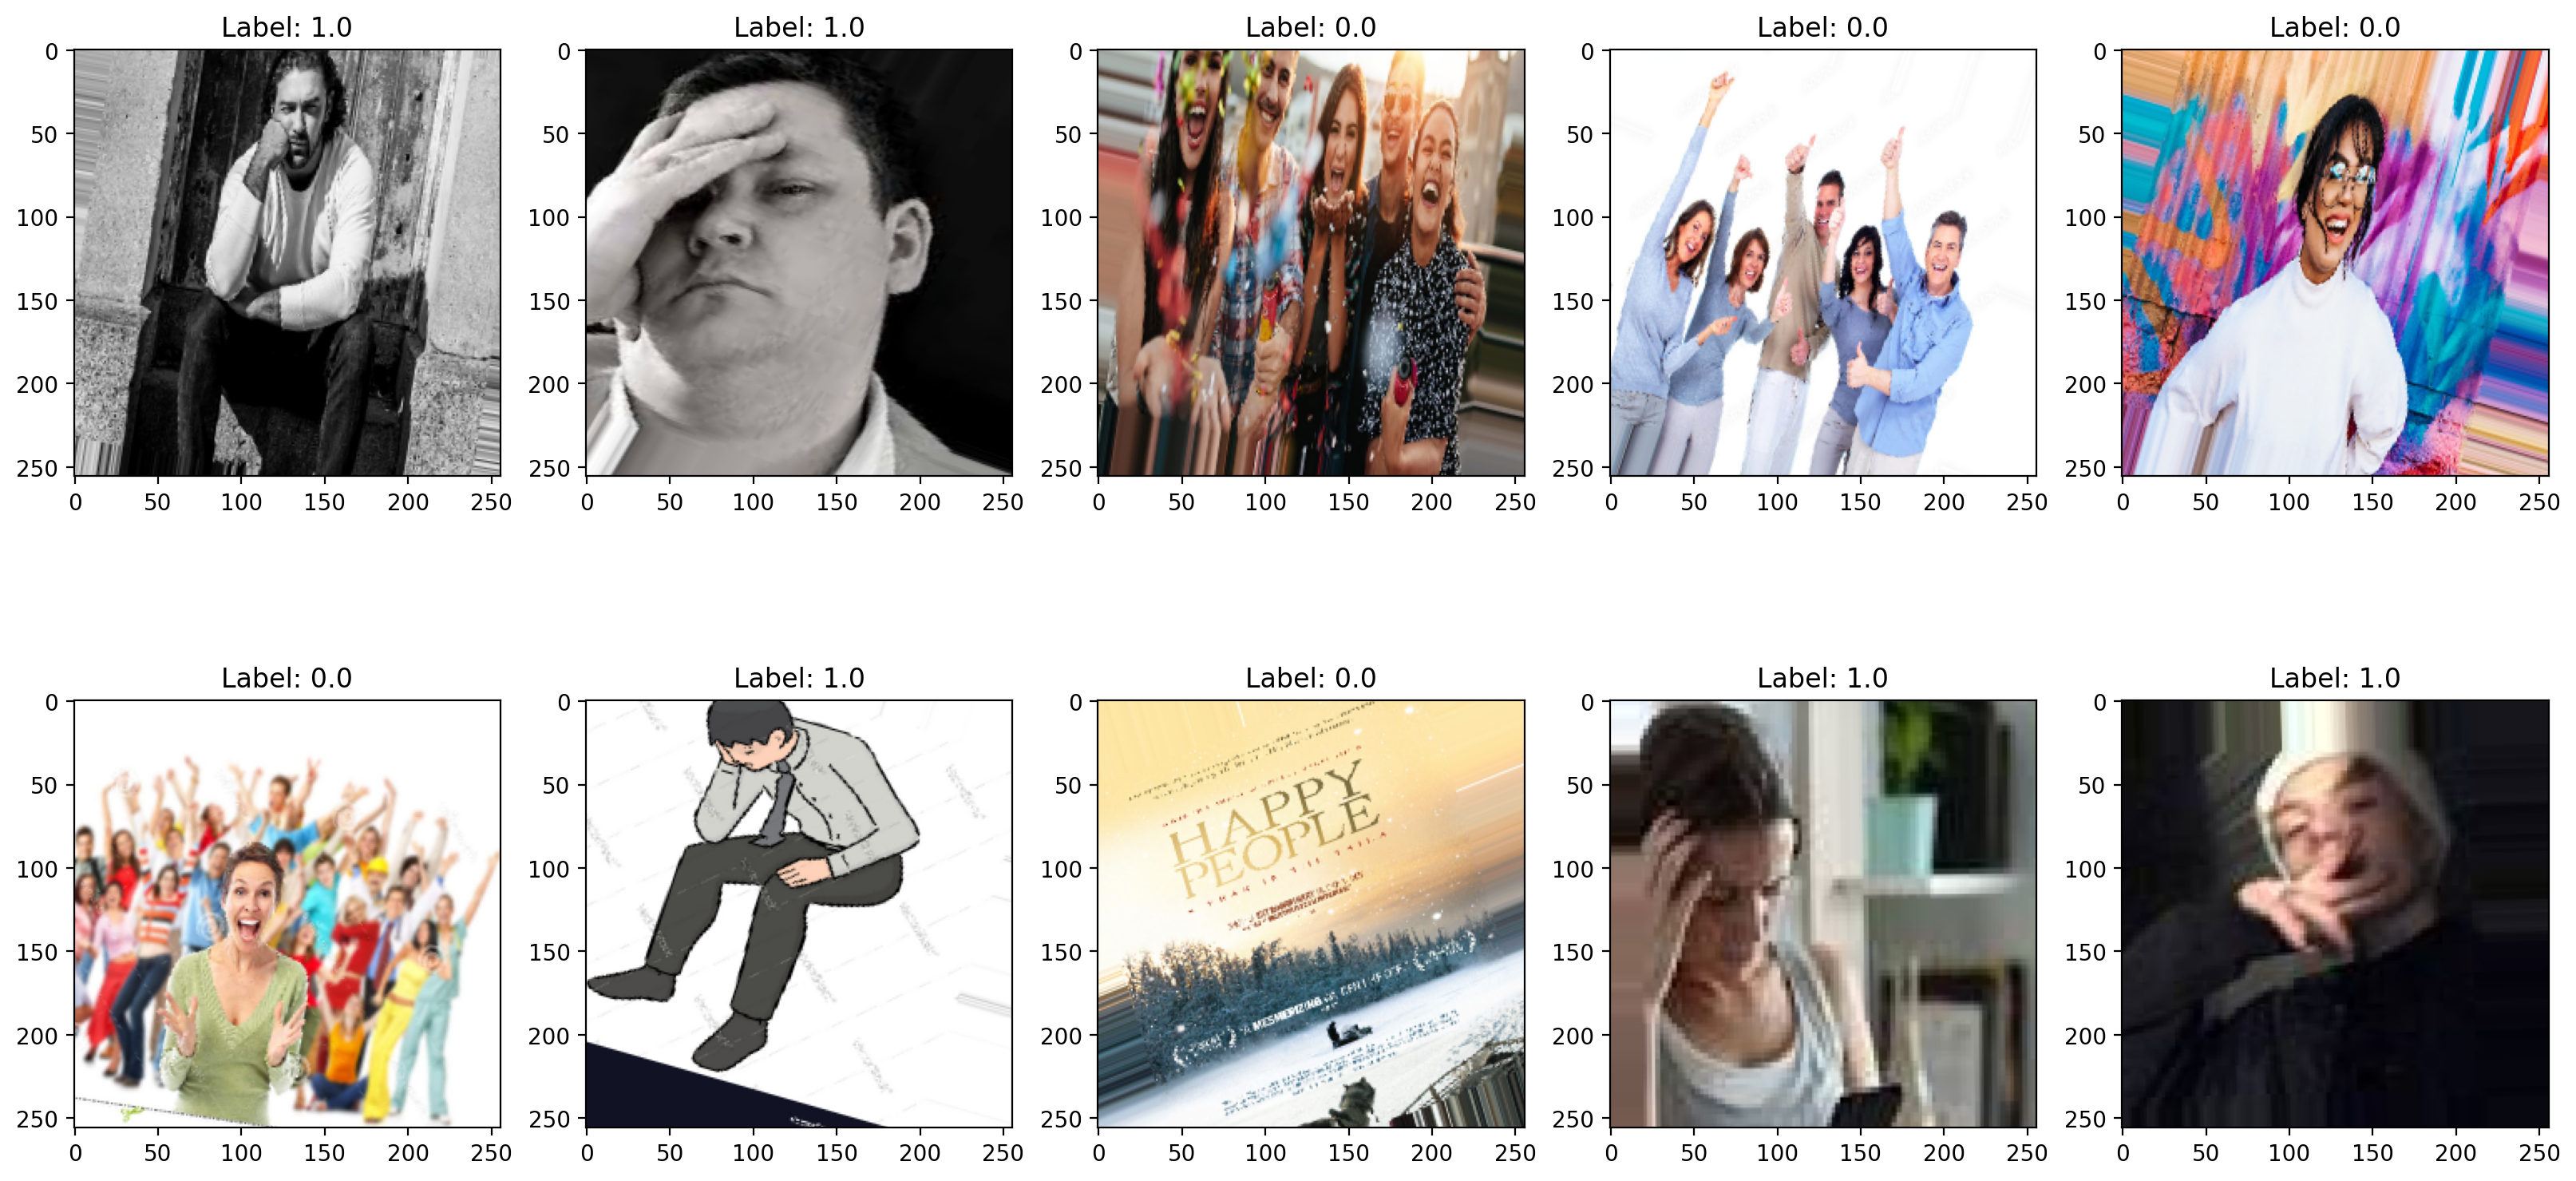

In [28]:
datagen = ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# generate batch of augmented data
generator = datagen.flow_from_directory(
    'D:\\jupyter\\happy_sad_classfier\\ImageClassification-main\\data',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary', 
    shuffle=True  
)

# Plotting augmented samples
batch = generator.next()
images, labels = batch
plt.figure(figsize=(20, 15), dpi=200)
columns = 5
for idx, image in enumerate(images):
    image = image.astype('uint8')
    print(image.shape)
    # Convert the number of rows to an integer
    num_rows = int(len(images) / columns) + 1
    
    plt.subplot(num_rows, columns, idx + 1)
    plt.imshow(image)
    plt.title("Label: {}".format(labels[idx]))

In [29]:
datagen = ImageDataGenerator(
    rescale=1./255) #scalling and normalizing the data

# 5- Split Data

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

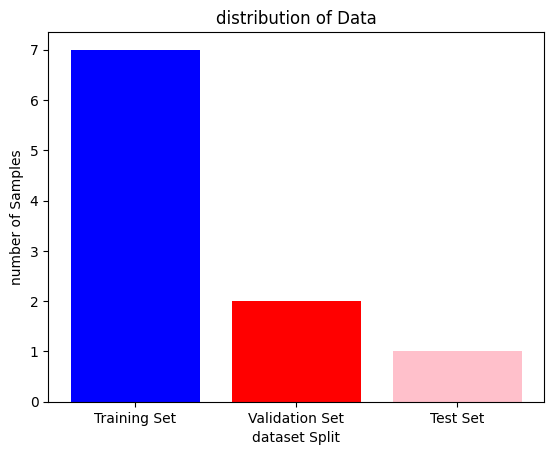

In [32]:
split_sizes = [train_size, val_size, test_size]
split_labels = ['Training Set', 'Validation Set', 'Test Set']

plt.bar(split_labels, split_sizes, color=['blue', 'red', 'pink'])
plt.xlabel('dataset Split')
plt.ylabel('number of Samples')
plt.title('distribution of Data')
plt.show()

# 6- Build Deep Learning Model

In [33]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Layer: batchnormalization

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7- Train

In [39]:
logdir='logs' #This sets the directory where the TensorBoard logs will be stored.
#tensorBoard is atool provided by TensorFlow for visualizing various aspects of the training process, such as loss, accuracy

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 679ms/step - loss: 143.4013 - accuracy: 0.5536 - val_loss: 17.1964 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 5s 648ms/step - loss: 10.9905 - accuracy: 0.4688 - val_loss: 0.6613 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 6s 661ms/step - loss: 0.8858 - accuracy: 0.6339 - val_loss: 0.7476 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 6s 667ms/step - loss: 0.6325 - accuracy: 0.7545 - val_loss: 0.4429 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 5s 651ms/step - loss: 0.4638 - accuracy: 0.8348 - val_loss: 0.3831 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 6s 658ms/step - loss: 0.3527 - accuracy: 0.9152 - val_loss: 0.3157 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 5s 651ms/step - loss: 0.2346 - accuracy: 0.9464 - val_loss: 0.1526 - val_accuracy: 0.9688
Epoch 8/20
7/7 [

# 8- Plot Performance

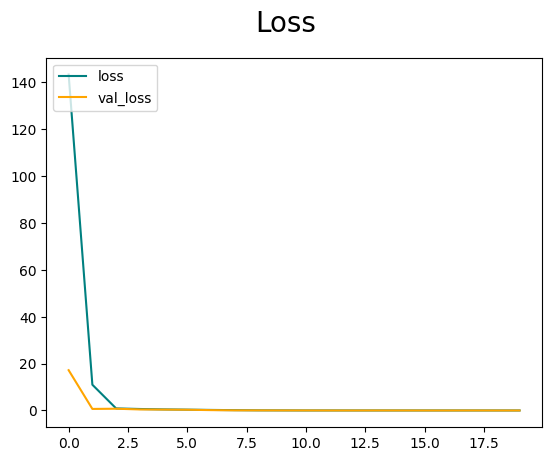

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

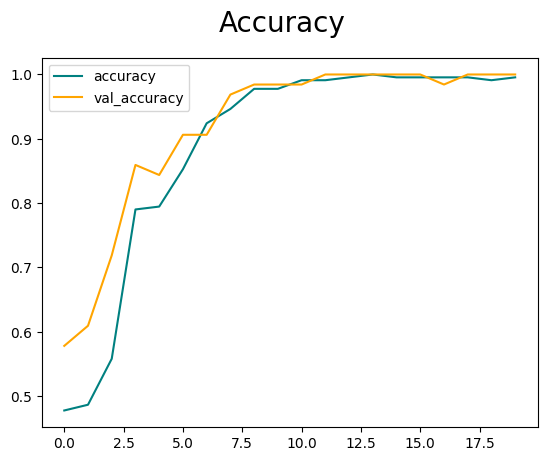

In [88]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9- Evaluate

In [89]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [91]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [92]:
y_true = []
y_pred = []

In [93]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 165ms/step


In [99]:
# Collect true and predicted labels
y_true.extend(y)
y_pred.extend(yhat)


In [100]:
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


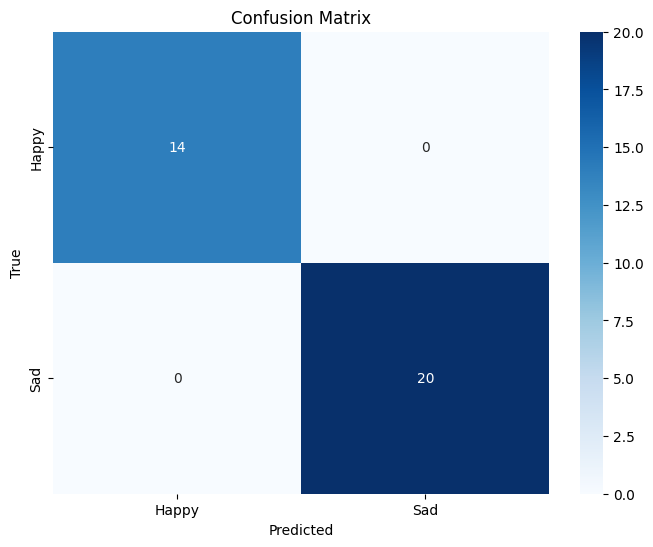

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_true, np.round(y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Happy', 'Sad'], yticklabels=['Happy', 'Sad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 10. Test

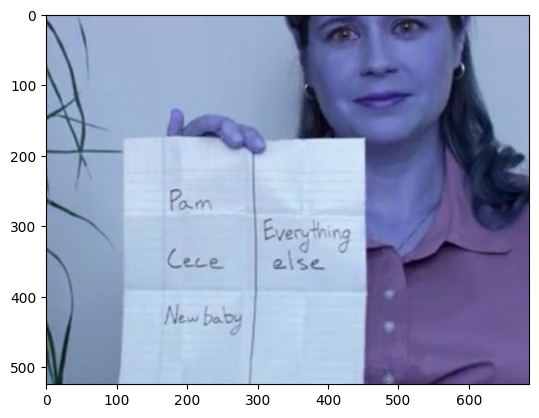

In [107]:
img = cv2.imread("C:\\Users\\shahd\\Downloads\\ebi86trr6g331.jpg")

plt.imshow(img)
plt.show()

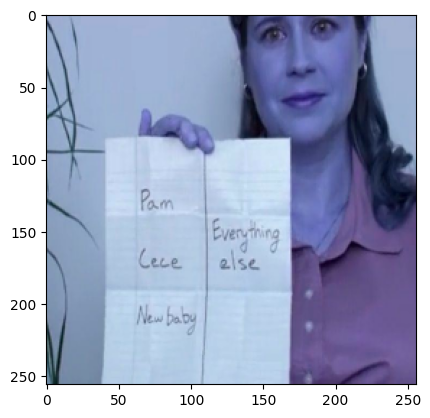

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [115]:
#yhat

In [116]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')
    

Predicted class is Happy


# 11- Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','imageclassifier.h5'))

In [49]:
new_model = load_model('models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))